In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Data Preprocessing

Removing the columns which don't have any impact on survival

In [3]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace = True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [4]:
df.isnull().values.any()

True

In [5]:
(df.Pclass.isnull().values.any(),
df.Sex.isnull().values.any(),
df.Age.isnull().values.any(),
df.Fare.isnull().values.any(),
df.Survived.isnull().values.any())

(False, False, True, False, False)

### Dealing with Null Values
Here the Age attribute has null values, filling all null values with the mean value of ages

In [6]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
(df.Pclass.isnull().values.any(),
df.Sex.isnull().values.any(),
df.Age.isnull().values.any(),
df.Fare.isnull().values.any(),
df.Survived.isnull().values.any())

(False, False, False, False, False)

### Converting Categorical values to Numerical values
Here the Sex attribute has text values, converting them to numerical form

In [8]:
Sex_dummies = pd.get_dummies(df['Sex'])
df = pd.concat([df, Sex_dummies], axis = 'columns')
df.head()

,Pclass,Sex,Age,Fare,Survived,female,male
0,3,male,22.0,7.2500,0,0,1
1,1,female,38.0,71.2833,1,1,0
2,3,female,26.0,7.9250,1,1,0
3,1,female,35.0,53.1000,1,1,0
4,3,male,35.0,8.0500,0,0,1


In [9]:
df.drop(['Sex', 'male'], axis = 'columns', inplace = True)
df.head()

,Pclass,Age,Fare,Survived,female
0,3,22.0,7.2500,0,0
1,1,38.0,71.2833,1,1
2,3,26.0,7.9250,1,1
3,1,35.0,53.1000,1,1
4,3,35.0,8.0500,0,0


In [10]:
inputs = df.drop(['Survived'], axis = 'columns')
target = df['Survived']

In [11]:
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [12]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
(x_train, x_test, y_train, y_test) = train_test_split(inputs, target, train_size = 0.8, random_state = 18)

In [14]:
len(x_train), len(x_test)

(712, 179)

In [15]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [16]:
model.score(x_test, y_test)

0.8268156424581006

In [17]:
y_predicted = model.predict(x_test)

In [18]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[92, 17],
       [14, 56]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

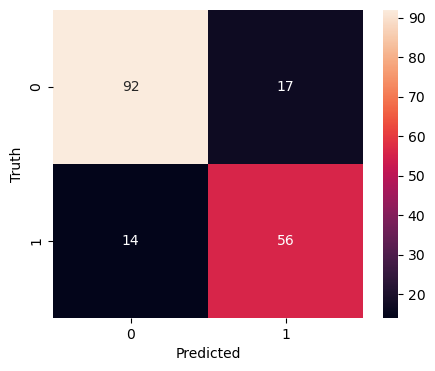

In [19]:
plt.figure(figsize = (5, 4))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model.predict_proba(x_test)

array([[7.06136753e-01, 2.93863247e-01],
       [9.26521951e-01, 7.34780489e-02],
       [5.78486616e-02, 9.42151338e-01],
       [9.19650015e-01, 8.03499846e-02],
       [6.02621153e-02, 9.39737885e-01],
       [9.59542680e-01, 4.04573196e-02],
       [1.97456178e-01, 8.02543822e-01],
       [9.62399634e-01, 3.76003662e-02],
       [2.77330214e-01, 7.22669786e-01],
       [6.55868651e-01, 3.44131349e-01],
       [9.62406832e-01, 3.75931683e-02],
       [9.61737807e-01, 3.82621926e-02],
       [4.20806569e-01, 5.79193431e-01],
       [3.79925281e-01, 6.20074719e-01],
       [5.71161908e-01, 4.28838092e-01],
       [9.53163810e-01, 4.68361900e-02],
       [2.03395841e-01, 7.96604159e-01],
       [2.53551403e-01, 7.46448597e-01],
       [9.59519930e-01, 4.04800698e-02],
       [4.09983580e-01, 5.90016420e-01],
       [9.17410393e-01, 8.25896074e-02],
       [9.59307371e-01, 4.06926286e-02],
       [9.21539160e-01, 7.84608405e-02],
       [9.25067935e-01, 7.49320654e-02],
       [3.806533